In [1]:
# 필요한 모듈 import
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# train, test 데이터 가져오기
# booking_status는 0, 1로 바꾸어 가져오기
train = pd.read_csv('./train.csv')
train["booking_status"] = train["booking_status"].replace({'Canceled':1, 'Not_Canceled':0})

test = pd.read_csv('./test.csv')
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  object 
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

In [4]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# import folium
# from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [5]:
data = train[train['booking_status'] == 0]
px.box(data_frame = data, x = 'room_type_reserved')

In [6]:
## for how long do people stay at the hotels? ##
filter = train['booking_status'] == 0
data = train[filter]
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0
6,INN35541,2,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,2,16,Online,0,0,0,85.00,0,0
7,INN27458,1,0,1,1,Meal Plan 2,0,Room_Type 1,301,2018,7,30,Offline,0,0,0,90.00,0,0


In [7]:
data.shape

(17114, 19)

In [8]:
data['no_of_total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_total_nights
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0,5
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0,2
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0,4
6,INN35541,2,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,2,16,Online,0,0,0,85.00,0,0,1
7,INN27458,1,0,1,1,Meal Plan 2,0,Room_Type 1,301,2018,7,30,Offline,0,0,0,90.00,0,0,2


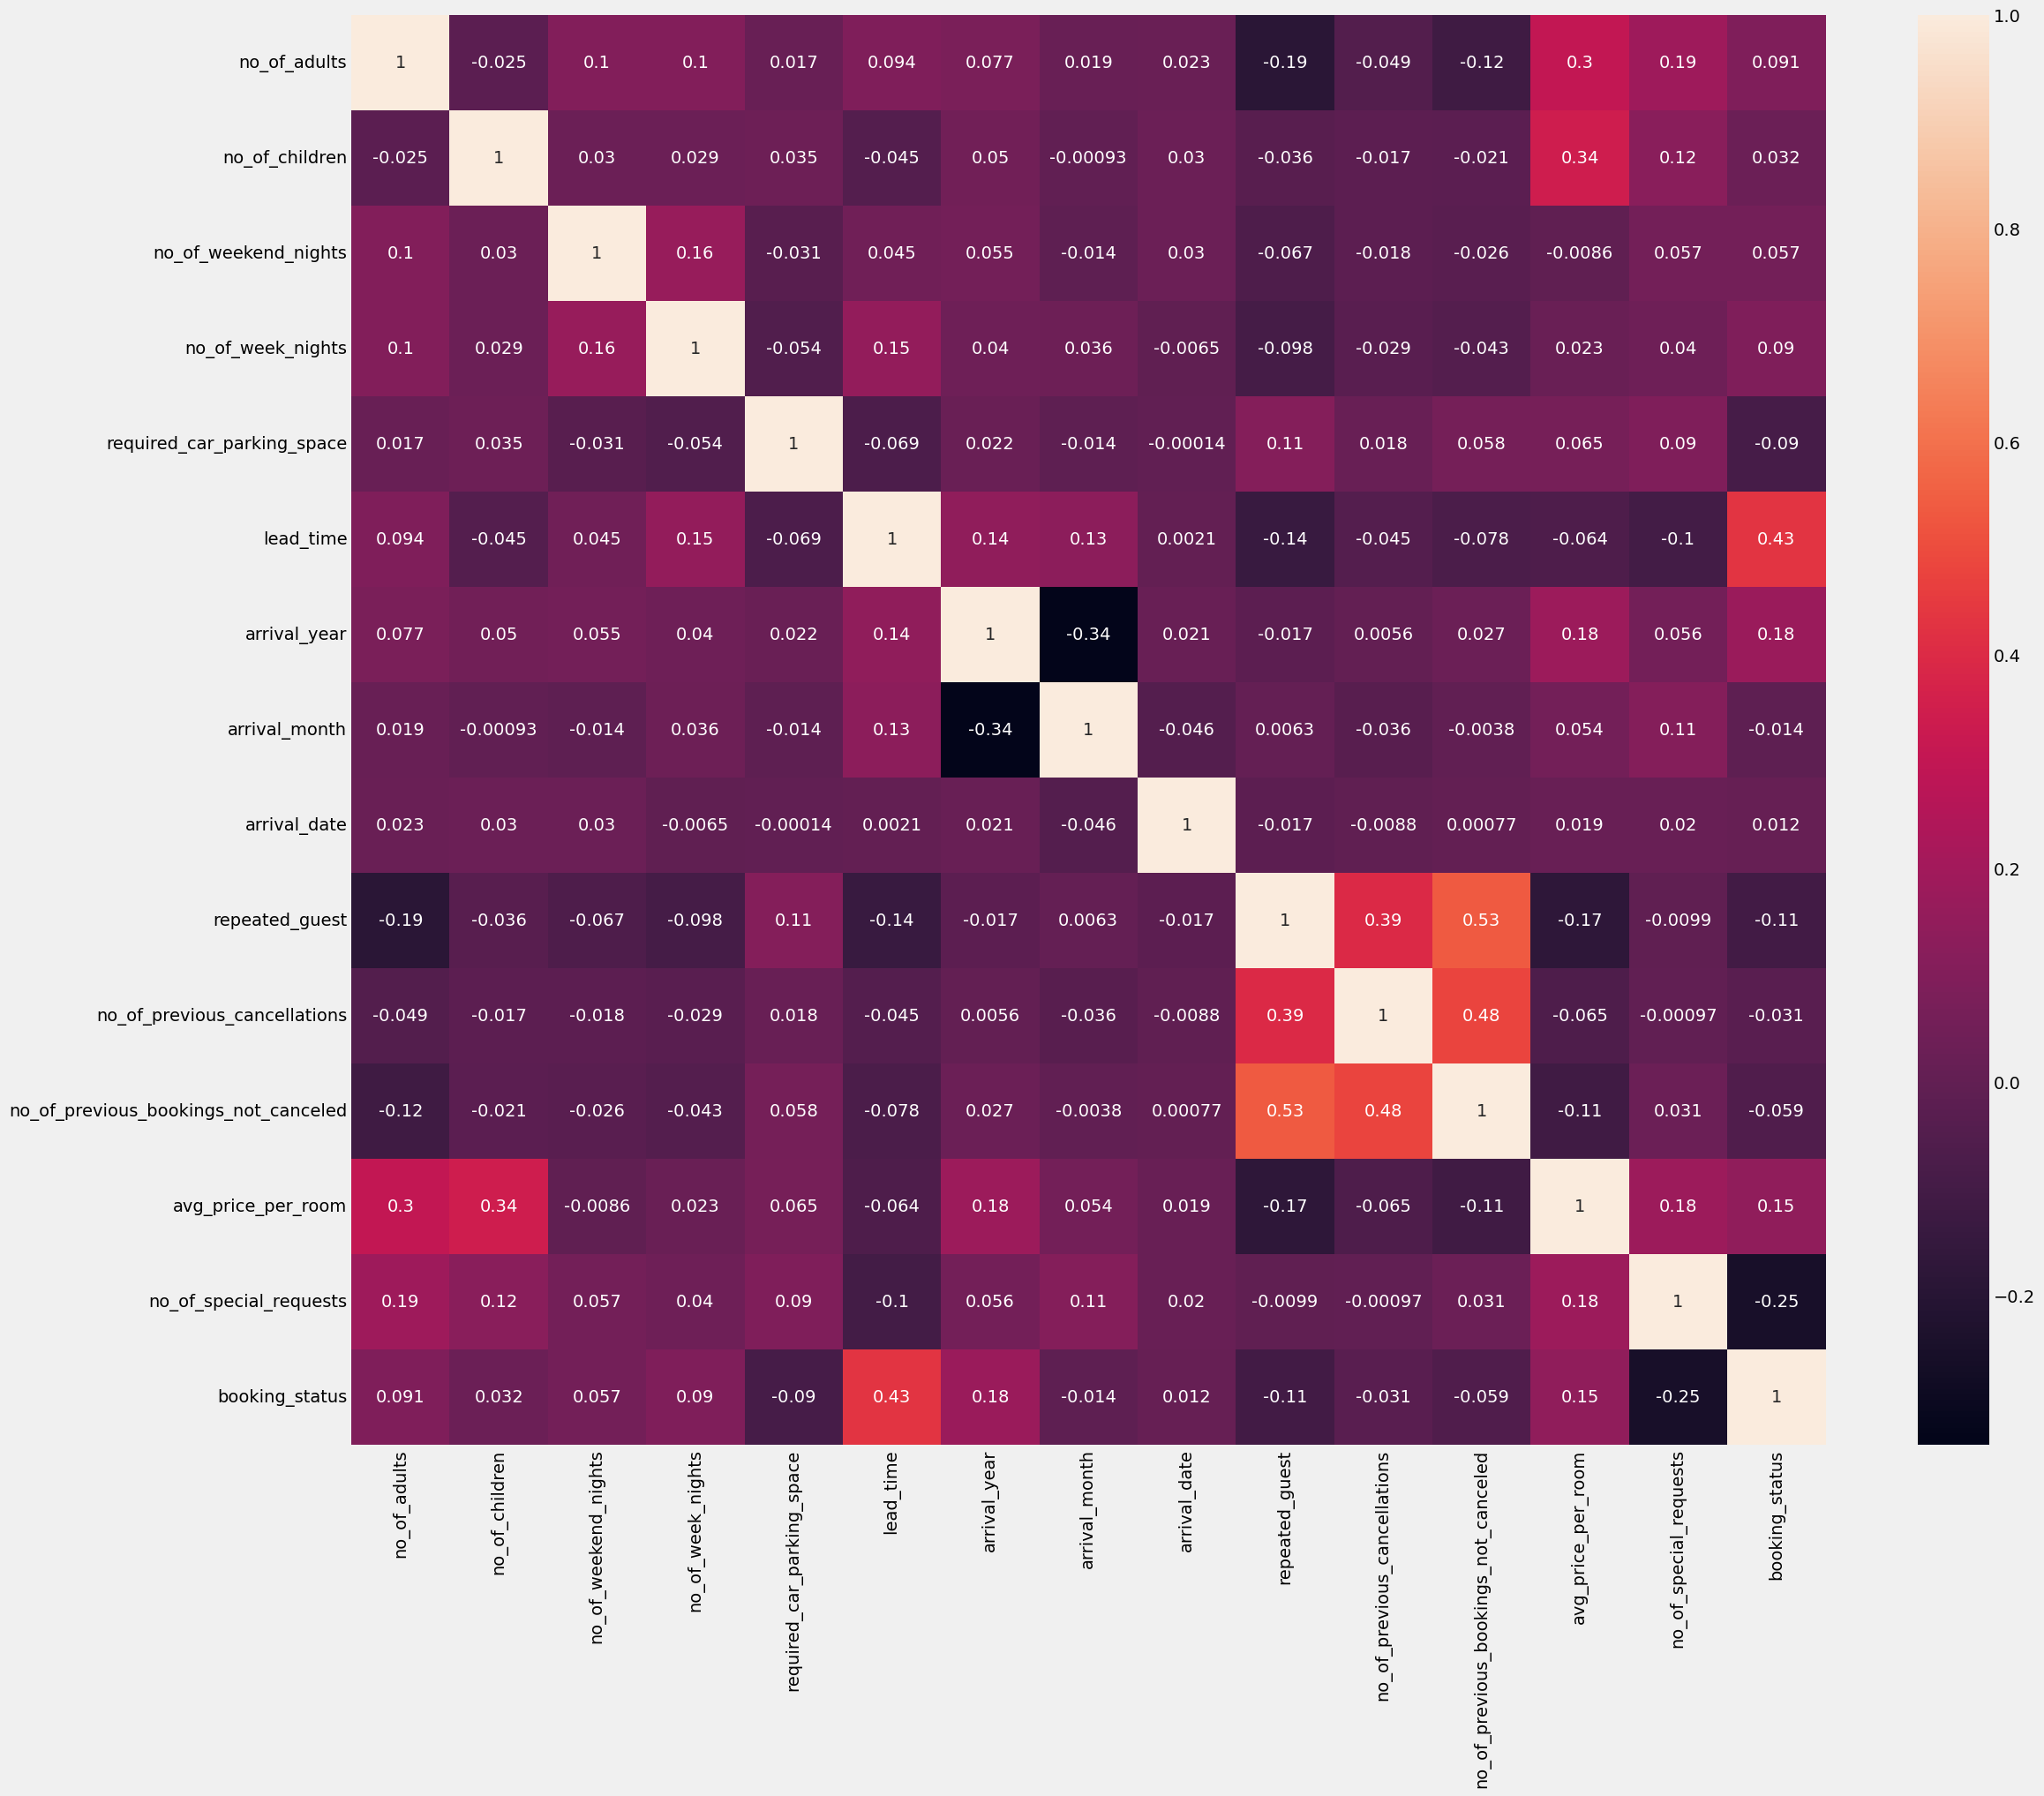

In [9]:
plt.figure(figsize=(24, 20))
corr = train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
correlation = train.corr()['booking_status'].abs().sort_values(ascending = False)
correlation

booking_status                          1.000000
lead_time                               0.432341
no_of_special_requests                  0.254901
arrival_year                            0.175495
avg_price_per_room                      0.145585
repeated_guest                          0.106916
no_of_adults                            0.091378
required_car_parking_space              0.090402
no_of_week_nights                       0.090325
no_of_previous_bookings_not_canceled    0.058706
no_of_weekend_nights                    0.057094
no_of_children                          0.031683
no_of_previous_cancellations            0.030817
arrival_month                           0.014238
arrival_date                            0.011965
Name: booking_status, dtype: float64

일단 아무것도 drop 안하고 진행하겠음 </br>
아니 뭘 지워야됨?

In [11]:
feature_drop = [
    'arrival_date', 'arrival_month', 'no_of_previous_cancellations', 'no_of_children',
]
data.drop(feature_drop, axis=1, inplace=True)

In [12]:
data.head()

,Booking_ID,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_total_nights
2,INN33900,2,1,4,Meal Plan 1,0,Room_Type 4,78,2018,Online,0,0,99.45,1,0,5
3,INN00721,2,2,0,Meal Plan 1,0,Room_Type 1,61,2017,Offline,0,0,91.00,0,0,2
4,INN22121,2,0,4,Meal Plan 1,0,Room_Type 1,201,2018,Online,0,0,82.28,3,0,4
6,INN35541,2,0,1,Meal Plan 1,0,Room_Type 1,8,2018,Online,0,0,85.00,0,0,1
7,INN27458,1,1,1,Meal Plan 2,0,Room_Type 1,301,2018,Offline,0,0,90.00,0,0,2


In [13]:
cat_cols = [col for col in train.columns if train[col].dtype == object]
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type']

In [14]:
cat_df = train[cat_cols]
cat_df.head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type
0,INN29581,Meal Plan 1,Room_Type 1,Online
1,INN06326,Meal Plan 1,Room_Type 1,Online
2,INN33900,Meal Plan 1,Room_Type 4,Online
3,INN00721,Meal Plan 1,Room_Type 1,Offline
4,INN22121,Meal Plan 1,Room_Type 1,Online


In [15]:
cat_df.drop(['Booking_ID'], axis=1, inplace=True)

In [16]:
cat_df.head()

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Online
1,Meal Plan 1,Room_Type 1,Online
2,Meal Plan 1,Room_Type 4,Online
3,Meal Plan 1,Room_Type 1,Offline
4,Meal Plan 1,Room_Type 1,Online


In [17]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

type_of_meal_plan: 
['Meal Plan 1' 'Meal Plan 2' 'Not Selected' 'Meal Plan 3']

room_type_reserved: 
['Room_Type 1' 'Room_Type 4' 'Room_Type 6' 'Room_Type 5' 'Room_Type 2'
 'Room_Type 7' 'Room_Type 3']

market_segment_type: 
['Online' 'Offline' 'Corporate' 'Aviation' 'Complementary']



* type_of_meal_plan: Meal Plan 3은 숫자가 너무 작아서 Meal Plan 1에 포함시킴

1, 2, 3이 차등이 있는지는 잘 모르겠지만 숫자가 증가해도 비중에 커서 영향이 안가는 Meal Plan 1에 포함시킴

In [18]:
cat_df['type_of_meal_plan'].value_counts()

Meal Plan 1     19492
Not Selected     3560
Meal Plan 2      2338
Meal Plan 3         2
Name: type_of_meal_plan, dtype: int64

* room_type_reserved: Room Type 3은 Room Type 4에 포함시킴


1, 2, 3이라는 숫자가 차등이라는 의미가 있는지는 모르겠지만...

In [19]:
cat_df['room_type_reserved'].value_counts()

Room_Type 1    19684
Room_Type 4     4242
Room_Type 6      667
Room_Type 2      498
Room_Type 5      186
Room_Type 7      111
Room_Type 3        4
Name: room_type_reserved, dtype: int64

In [20]:
cat_df['market_segment_type'].value_counts()

Online           16210
Offline           7398
Corporate         1427
Complementary      272
Aviation            85
Name: market_segment_type, dtype: int64

In [21]:
cat_df['type_of_meal_plan'] = cat_df['type_of_meal_plan'].map({
    'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Not Selected 1': 2, 'Meal Plan 3': 0
})

cat_df['room_type_reserved'] = cat_df['room_type_reserved'].map({
    'Room_Type 1': 0, 'Room_Type 4': 1, 'Room_Type 6': 2, 'Room_Type 5': 3, 'Room_Type 2': 4, 'Room_Type 7': 5, 'Room_Type 3': 6
})

cat_df['market_segment_type'] = cat_df['market_segment_type'].map({
    'Online': 0, 'Offline': 1, 'Corporate': 2, 'Complementary': 3, 'Aviation': 4
})

In [22]:
cat_df.head()

,type_of_meal_plan,room_type_reserved,market_segment_type
0,0.0,0,0
1,0.0,0,0
2,0.0,1,0
3,0.0,0,1
4,0.0,0,0


In [23]:
num_df = data.drop(columns=cat_cols, axis=1)
num_df.drop('booking_status', axis=1, inplace=True)
num_df

,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights
2,2,1,4,0,78,2018,0,0,99.45,1,5
3,2,2,0,0,61,2017,0,0,91.00,0,2
4,2,0,4,0,201,2018,0,0,82.28,3,4
6,2,0,1,0,8,2018,0,0,85.00,0,1
7,1,1,1,0,301,2018,0,0,90.00,0,2
...,...,...,...,...,...,...,...,...,...,...,...
25385,2,2,3,0,86,2018,0,0,126.90,1,5
25386,2,0,2,0,0,2018,0,0,139.50,1,2
25387,2,2,2,0,43,2017,0,0,55.00,2,4
25389,2,0,2,0,5,2018,0,0,110.00,1,2


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17114 entries, 2 to 25391
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            17114 non-null  object 
 1   no_of_adults                          17114 non-null  int64  
 2   no_of_weekend_nights                  17114 non-null  int64  
 3   no_of_week_nights                     17114 non-null  int64  
 4   type_of_meal_plan                     17114 non-null  object 
 5   required_car_parking_space            17114 non-null  int64  
 6   room_type_reserved                    17114 non-null  object 
 7   lead_time                             17114 non-null  int64  
 8   arrival_year                          17114 non-null  int64  
 9   market_segment_type                   17114 non-null  object 
 10  repeated_guest                        17114 non-null  int64  
 11  no_of_previous_

In [24]:
num_df.var()

no_of_adults                               0.281637
no_of_weekend_nights                       0.716054
no_of_week_nights                          1.725190
required_car_parking_space                 0.040517
lead_time                               4179.090389
arrival_year                               0.175740
repeated_guest                             0.035459
no_of_previous_bookings_not_canceled       4.881265
avg_price_per_room                      1286.823283
no_of_special_requests                     0.701081
no_of_total_nights                         2.703043
dtype: float64

In [25]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
# num_df['arrival_month'] = np.log(num_df['arrival_month'] + 1)
# num_df['arrival_date'] = np.log(num_df['arrival_date'] + 1)
num_df['avg_price_per_room'] = np.log(num_df['avg_price_per_room'] + 1)

In [26]:
num_df.var()

no_of_adults                            0.281637
no_of_weekend_nights                    0.716054
no_of_week_nights                       1.725190
required_car_parking_space              0.040517
lead_time                               2.153178
arrival_year                            0.175740
repeated_guest                          0.035459
no_of_previous_bookings_not_canceled    4.881265
avg_price_per_room                      0.570757
no_of_special_requests                  0.701081
no_of_total_nights                      2.703043
dtype: float64

In [27]:
num_df.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights
2,2,1,4,0,4.369448,2018,0,0,4.609660,1,5
3,2,2,0,0,4.127134,2017,0,0,4.521789,0,2
4,2,0,4,0,5.308268,2018,0,0,4.422208,3,4
6,2,0,1,0,2.197225,2018,0,0,4.454347,0,1
7,1,1,1,0,5.710427,2018,0,0,4.510860,0,2


In [28]:
X = pd.concat([cat_df, num_df], axis=1)
y = train['booking_status']

In [29]:
X.shape, y.shape

((25392, 14), (25392,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
X_train.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights
14267,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18892,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8005,0.0,0,0,1.0,1.0,5.0,0.0,4.356709,2018.0,0.0,0.0,4.260424,1.0,6.0
3005,0.0,0,1,2.0,0.0,3.0,0.0,3.784190,2018.0,0.0,0.0,4.330733,0.0,3.0
4228,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20313 entries, 14267 to 7300
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   type_of_meal_plan                     17465 non-null  float64
 1   room_type_reserved                    20313 non-null  int64  
 2   market_segment_type                   20313 non-null  int64  
 3   no_of_adults                          13659 non-null  float64
 4   no_of_weekend_nights                  13659 non-null  float64
 5   no_of_week_nights                     13659 non-null  float64
 6   required_car_parking_space            13659 non-null  float64
 7   lead_time                             13659 non-null  float64
 8   arrival_year                          13659 non-null  float64
 9   repeated_guest                        13659 non-null  float64
 10  no_of_previous_bookings_not_canceled  13659 non-null  float64
 11  avg_price_pe

In [32]:
X_test.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights
3521,0.0,0,0,2.0,0.0,1.0,0.0,1.098612,2017.0,0.0,0.0,4.828314,2.0,1.0
20033,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24049,0.0,1,0,3.0,2.0,3.0,0.0,3.871201,2018.0,0.0,0.0,5.088213,2.0,5.0
2479,0.0,1,1,2.0,0.0,3.0,0.0,3.401197,2017.0,0.0,0.0,4.330733,0.0,3.0
4153,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
new_test.head()

NameError: name 'new_test' is not defined

### Building Model

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Use the same imputer object to transform the test data
X_test_imputed = imputer.transform(X_test)

# Train the model on the imputed data
lr = LogisticRegression()
lr.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_pred_lr = lr.predict(X_test_imputed)

# Evaluate the model
acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7903130537507383
Confusion Matrix : 
[[3034  373]
 [ 692  980]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3407
           1       0.72      0.59      0.65      1672

    accuracy                           0.79      5079
   macro avg       0.77      0.74      0.75      5079
weighted avg       0.78      0.79      0.78      5079



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# create imputer
imputer = SimpleImputer(strategy='mean')

# apply imputer to X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# create and fit DecisionTreeClassifier
dtc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=4,
)
dtc.fit(X_train_imputed, y_train)

# predict and evaluate model
y_pred_dtc = dtc.predict(X_test_imputed)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8552864737152983
Confusion Matrix : 
[[3112  295]
 [ 440 1232]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3407
           1       0.81      0.74      0.77      1672

    accuracy                           0.86      5079
   macro avg       0.84      0.83      0.83      5079
weighted avg       0.85      0.86      0.85      5079



In [ ]:
from sklearn.impute import SimpleImputer

# create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# impute missing values in X_train
X_train = imputer.fit_transform(X_train)

# impute missing values in X_test
X_test = imputer.transform(X_test)

# train and evaluate the model
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8976176412679662
Confusion Matrix : 
[[3237  170]
 [ 350 1322]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3407
           1       0.89      0.79      0.84      1672

    accuracy                           0.90      5079
   macro avg       0.89      0.87      0.88      5079
weighted avg       0.90      0.90      0.90      5079



In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=15,
    weights='distance',
    metric='euclidean'
)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8609962591061232
Confusion Matrix : 
[[3111  296]
 [ 410 1262]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      3407
           1       0.81      0.75      0.78      1672

    accuracy                           0.86      5079
   macro avg       0.85      0.83      0.84      5079
weighted avg       0.86      0.86      0.86      5079



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','KNN'],
    'Score' : [acc_lr, acc_dtc, acc_rd_clf, acc_knn]})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.897618
3,KNN,0.860996
1,Decision Tree Classifier,0.855286
0,Logistic Regression,0.790313


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            10883 non-null  object 
 1   no_of_adults                          10883 non-null  int64  
 2   no_of_children                        10883 non-null  int64  
 3   no_of_weekend_nights                  10883 non-null  int64  
 4   no_of_week_nights                     10883 non-null  int64  
 5   type_of_meal_plan                     10883 non-null  object 
 6   required_car_parking_space            10883 non-null  int64  
 7   room_type_reserved                    10883 non-null  object 
 8   lead_time                             10883 non-null  int64  
 9   arrival_year                          10883 non-null  int64  
 10  arrival_month                         10883 non-null  int64  
 11  arrival_date   

In [ ]:
test['type_of_meal_plan'].value_counts()

Meal Plan 1     8343
Not Selected    1570
Meal Plan 2      967
Meal Plan 3        3
Name: type_of_meal_plan, dtype: int64

In [ ]:
test.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,INN04969,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3
1,INN34541,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0
2,INN36109,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1
3,INN01554,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0
4,INN24975,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2


In [ ]:
test['no_of_total_nights'] = test['no_of_weekend_nights'] + test['no_of_week_nights']
test.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights
0,INN04969,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,1
1,INN34541,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,3
2,INN36109,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,4
3,INN01554,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,3
4,INN24975,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,2


In [ ]:
test.drop(feature_drop, axis=1, inplace=True)

In [ ]:
t_cat_cols = [col for col in test.columns if test[col].dtype == object]

t_cat_df = test[t_cat_cols]

t_cat_df.drop(['Booking_ID'], axis=1, inplace=True)

In [ ]:
t_cat_df['type_of_meal_plan'] = t_cat_df['type_of_meal_plan'].map({
    'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Not Selected': 2, 'Meal Plan 3': 0
})

t_cat_df['room_type_reserved'] = t_cat_df['room_type_reserved'].map({
    'Room_Type 1': 0, 'Room_Type 4': 1, 'Room_Type 6': 2, 'Room_Type 5': 3, 'Room_Type 2': 4, 'Room_Type 7': 5, 'Room_Type 3': 6
})

t_cat_df['market_segment_type'] = t_cat_df['market_segment_type'].map({
    'Online': 0, 'Offline': 1, 'Corporate': 2, 'Complementary': 3, 'Aviation': 4
})

In [ ]:
t_cat_df['type_of_meal_plan'].view()

0        0
1        0
2        0
3        0
4        0
        ..
10878    0
10879    0
10880    0
10881    0
10882    2
Name: type_of_meal_plan, Length: 10883, dtype: int64

In [ ]:
t_num_df = test.drop(columns=t_cat_cols, axis=1)
# t_num_df.drop('booking_status', axis=1, inplace=True)

In [ ]:
t_num_df['lead_time'] = np.log(t_num_df['lead_time'] + 1)
# t_num_df['arrival_month'] = np.log(t_num_df['arrival_month'] + 1)
# t_num_df['arrival_date'] = np.log(t_num_df['arrival_date'] + 1)
t_num_df['avg_price_per_room'] = np.log(t_num_df['avg_price_per_room'] + 1)

In [ ]:
new_test = X = pd.concat([t_cat_df, t_num_df], axis=1)

In [ ]:
new_test.isnull().sum()

type_of_meal_plan                       0
room_type_reserved                      0
market_segment_type                     0
no_of_adults                            0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
repeated_guest                          0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
no_of_total_nights                      0
dtype: int64

In [ ]:
new_test.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_total_nights
0,0,0,0,2,1,0,0,1.386294,2017,0,0,4.510860,3,1
1,0,1,1,2,1,2,0,2.302585,2018,0,0,3.905401,0,3
2,0,0,0,2,2,2,0,3.218876,2018,0,0,4.566429,1,4
3,0,0,0,2,0,3,0,3.178054,2018,0,0,4.857251,0,3
4,0,1,0,2,0,2,0,2.302585,2018,0,0,5.310740,2,2


In [ ]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   type_of_meal_plan                     10883 non-null  int64  
 1   room_type_reserved                    10883 non-null  int64  
 2   market_segment_type                   10883 non-null  int64  
 3   no_of_adults                          10883 non-null  int64  
 4   no_of_weekend_nights                  10883 non-null  int64  
 5   no_of_week_nights                     10883 non-null  int64  
 6   required_car_parking_space            10883 non-null  int64  
 7   lead_time                             10883 non-null  float64
 8   arrival_year                          10883 non-null  int64  
 9   repeated_guest                        10883 non-null  int64  
 10  no_of_previous_bookings_not_canceled  10883 non-null  int64  
 11  avg_price_per_r

In [ ]:
new_test['type_of_meal_plan'].value_counts()

0    8346
2    1570
1     967
Name: type_of_meal_plan, dtype: int64

In [ ]:
# knn.fit(train_data2, target)
prediction_list = knn.predict(new_test)

submit = pd.read_csv("./sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})
submit

ValueError: X has 14 features, but KNeighborsClassifier is expecting 17 features as input.

In [ ]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'